In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [2]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [3]:
def data_preporation(link, type_file='csv', dum=True, clean=True):
    if type_file == 'csv':
        df = pd.read_csv(link)
    if dum:
        df = pd.get_dummies(df)
    if clean:
        clean_dataset(df)
    return df

In [4]:
air_satisfaction_data = data_preporation('.//datasets//airlines_passanger_saisfaction//train.csv')
air_satisfaction_data

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,...,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,satisfaction_neutral or dissatisfied,satisfaction_satisfied
0,0,70172,13,460,3,4,3,1,5,3,...,1,1,0,0,1,0,0,1,1,0
1,1,5047,25,235,3,2,3,3,1,3,...,1,0,1,1,0,1,0,0,1,0
2,2,110028,26,1142,2,2,2,2,5,5,...,0,1,0,1,0,1,0,0,0,1
3,3,24026,25,562,2,5,5,5,2,2,...,0,1,0,1,0,1,0,0,1,0
4,4,119299,61,214,3,3,3,3,4,5,...,1,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,23,192,2,1,2,3,2,2,...,0,0,1,1,0,0,1,0,1,0
103900,103900,73097,49,2347,4,4,4,4,2,4,...,1,1,0,1,0,1,0,0,0,1
103901,103901,68825,30,1995,1,1,1,3,4,1,...,1,0,1,1,0,1,0,0,1,0
103902,103902,54173,22,1000,1,1,1,5,1,1,...,0,0,1,1,0,0,1,0,1,0


In [5]:
y = air_satisfaction_data.satisfaction_satisfied
X = air_satisfaction_data.drop(['Gender_Female', 
                                'Customer Type_disloyal Customer', 
                                'Type of Travel_Personal Travel', 
                                'satisfaction_neutral or dissatisfied',
                                'satisfaction_satisfied', 
                                'Unnamed: 0', 
                                'id'], axis=1)
X.rename(columns={'Gender_Male':'Gender', 
                  'Customer Type_Loyal Customer':'Customer',
                  'Type of Travel_Business travel':'Type of Travel'})
X.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Customer Type_Loyal Customer,Type of Travel_Business travel,Class_Business,Class_Eco,Class_Eco Plus
0,13,460,3,4,3,1,5,3,5,5,...,5,5,25,18.0,1,1,0,0,0,1
1,25,235,3,2,3,3,1,3,1,1,...,4,1,1,6.0,1,0,1,1,0,0
2,26,1142,2,2,2,2,5,5,5,5,...,4,5,0,0.0,0,1,1,1,0,0
3,25,562,2,5,5,5,2,2,2,2,...,4,2,11,9.0,0,1,1,1,0,0
4,61,214,3,3,3,3,4,5,5,3,...,3,3,0,0.0,1,1,1,1,0,0


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
dt = RandomForestClassifier(max_depth=21, n_estimators=56)
param = {'n_estimators': [i for i in range(50, 61, 1)]}
gscv =  GridSearchCV(dt, param, cv=3, n_jobs=-1, verbose=1)
gscv.fit(X_train, y_train)

Fitting 3 folds for each of 11 candidates, totalling 33 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 out of  33 | elapsed:  4.1min finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(max_depth=21), n_jobs=-1,
             param_grid={'n_estimators': [50, 51, 52, 53, 54, 55, 56, 57, 58,
                                          59, 60]},
             verbose=1)

In [7]:
gscv.best_params_

{'n_estimators': 56}

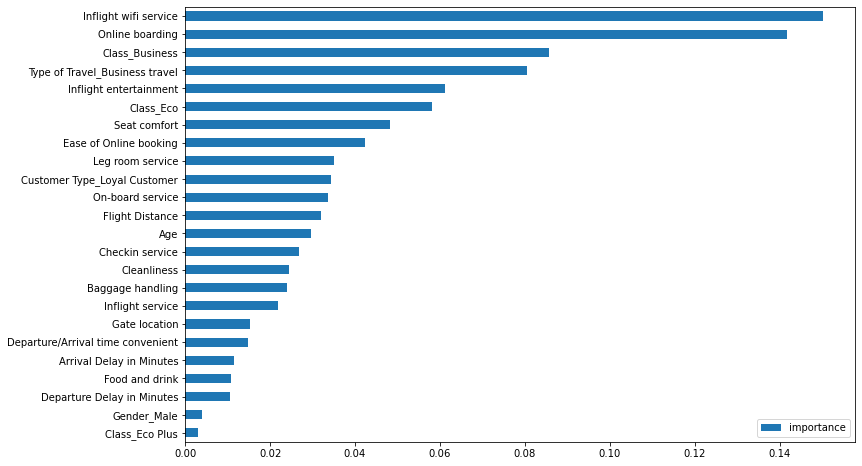

In [8]:
best_c = gscv.best_estimator_
imp = pd.DataFrame(best_c.feature_importances_, index=X_train.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))

In [9]:
best_c.score(X_test, y_test)

0.9582991457116656

In [11]:
validation = data_preporation('.//datasets//airlines_passanger_saisfaction//test.csv')
validation

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,...,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,satisfaction_neutral or dissatisfied,satisfaction_satisfied
0,0,19556,52,160,5,4,3,4,3,4,...,0,1,0,1,0,0,1,0,0,1
1,1,90035,36,2863,1,1,3,1,5,4,...,0,1,0,1,0,1,0,0,0,1
2,2,12360,20,192,2,0,2,4,2,2,...,1,0,1,1,0,0,1,0,1,0
3,3,77959,44,3377,0,0,0,2,3,4,...,1,1,0,1,0,1,0,0,0,1
4,4,36875,49,1182,2,3,4,3,4,1,...,0,1,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,25971,78463,34,526,3,3,3,1,4,3,...,1,0,1,1,0,1,0,0,1,0
25972,25972,71167,23,646,4,4,4,4,4,4,...,1,1,0,1,0,1,0,0,0,1
25973,25973,37675,17,828,2,5,1,5,2,1,...,0,1,0,0,1,0,1,0,1,0
25974,25974,90086,14,1127,3,3,3,3,4,4,...,1,1,0,1,0,1,0,0,0,1
